In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

count_vect = CountVectorizer()

df = pd.read_csv("data/processed/TextClass/table.csv")
df

,spam,Subject,Body
0,0,27056 25118 47577 45908 39616,284 14851 80 16147 17345 14338 130 19410 47 58...
1,0,27056 25118 39140 25084 38147 26613 25383 2508...,284 4353 47 17011 15691 9997 18783 1613 1613 9...
2,0,27056 25118 35542 26359 27268 26822,8962 180 2331 1967 4602 24704 196 18464 2130 9...
3,1,45259 25082 48231 25086 41667 25082 34634 2508...,7062 118 22880 4177 5762 80 17713 2519 13406 1...
4,1,47180 39988 25047,10769 13520 19074 51 305 51 16263 16296 19054 ...
...,...,...,...
1085,0,27056 25118 36457 42524 40836 25068 36521 2504...,16733 19054 118 6306 118 86 86 17212 84 1672 8...
1086,1,29053 29074 29532,10179 1968 15193 1812 17345 21366 16502 17154 ...
1087,0,27056 25118 46215 26662 26835 35470,284 13383 80 127 24731 2328 2130 130 21196 84 ...
1088,0,45787,183 180 205 205 191 214 227 219 180 219 190 22...


In [266]:
df.spam.value_counts()

0    610
1    480
Name: spam, dtype: int64

In [267]:
subject = count_vect.fit_transform(df.Subject)

<1090x1699 sparse matrix of type '<class 'numpy.int64'>'
	with 6689 stored elements in Compressed Sparse Row format>

In [268]:
body = count_vect.fit_transform(df.Body)

<1090x24575 sparse matrix of type '<class 'numpy.int64'>'
	with 245044 stored elements in Compressed Sparse Row format>

In [269]:
full = count_vect.fit_transform(df.Subject + df.Body)

In [270]:
full.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [271]:
# full[full > 1] = 1
# full.toarray()
# full_1 = full

In [272]:
subject_1 = subject.copy()
subject_1[subject_1 > 1] = 1
body_1 = body.copy()
body_1[body_1 > 1] = 1
full_1 = full.copy()
full_1[full_1 > 1] = 1

In [273]:
def bayes_classifier_base(feature, print_confusion_matrix = False):
    X = feature
    y = df.spam
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
    clf = MultinomialNB()
    # clf = MultinomialNB(alpha=4, fit_prior=True, class_prior=[0.6, 0.4])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    if print_confusion_matrix:
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred), fp)
    return y_test, clf.predict_proba(X_test)

bayes_classifier_base(subject, True)
bayes_classifier_base(subject_1, True)
bayes_classifier_base(body, True)
bayes_classifier_base(body_1, True)
bayes_classifier_base(full, True)
bayes_classifier_base(full_1, True)

Confusion matrix:
 [[160  17]
 [ 26 124]] 17
Confusion matrix:
 [[160  17]
 [ 21 129]] 17
Confusion matrix:
 [[162  15]
 [  5 145]] 15
Confusion matrix:
 [[168   9]
 [  1 149]] 9
Confusion matrix:
 [[163  14]
 [  5 145]] 14
Confusion matrix:
 [[170   7]
 [  1 149]] 7


(58      1
 287     1
 893     1
 166     0
 63      0
        ..
 411     1
 78      0
 1065    1
 175     0
 193     0
 Name: spam, Length: 327, dtype: int64,
 array([[2.32588354e-218, 1.00000000e+000],
        [1.19701488e-084, 1.00000000e+000],
        [3.61752413e-308, 1.00000000e+000],
        [1.00000000e+000, 6.17207343e-051],
        [1.00000000e+000, 1.60296508e-036],
        [6.37677668e-075, 1.00000000e+000],
        [1.00000000e+000, 2.11278059e-010],
        [3.95389939e-027, 1.00000000e+000],
        [1.00000000e+000, 1.97439702e-013],
        [2.61893257e-049, 1.00000000e+000],
        [1.00000000e+000, 1.30617358e-028],
        [1.00000000e+000, 8.76505984e-072],
        [6.94109852e-024, 1.00000000e+000],
        [1.00000000e+000, 9.34131625e-048],
        [1.00000000e+000, 3.17296120e-095],
        [1.00000000e+000, 3.22401217e-043],
        [2.12494082e-061, 1.00000000e+000],
        [1.00000000e+000, 3.27310518e-022],
        [1.00000000e+000, 1.19287752e-042],
   

In [274]:
classifier = MultinomialNB()
x_train, x_test, y_train, y_test = train_test_split(df[["Subject", "Body"]], df["spam"], test_size=0.4, random_state=4)

x_train = count_vect.transform(x_train.Subject + x_train.Body)
x_test = count_vect.transform(x_test.Subject + x_test.Body)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

y_pred_proba = classifier.predict_proba(x_test)

In [275]:
accuracy_score(y_test, y_pred)

0.9541284403669725

In [276]:
y_test

58     1
287    1
893    1
166    0
63     0
      ..
750    1
877    1
114    0
310    1
374    0
Name: spam, Length: 436, dtype: int64

In [277]:
confuse = confusion_matrix(y_test, y_pred)
confuse

array([[227,  16],
       [  4, 189]], dtype=int64)

In [278]:
classifier = MultinomialNB()
x_train, x_test, y_train, y_test = train_test_split(df[["Subject", "Body"]], df["spam"], test_size=0.4, random_state=4)

x_train = count_vect.fit_transform(x_train.Body)
x_test = count_vect.transform(x_test.Body)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [279]:
confuse = confusion_matrix(y_test, y_pred)
confuse

array([[224,  19],
       [  4, 189]], dtype=int64)

In [280]:
classifier = MultinomialNB()
x_train, x_test, y_train, y_test = train_test_split(df[["Subject", "Body"]], df["spam"], test_size=0.4, random_state=4)

x_train = count_vect.fit_transform(x_train.Subject)
x_test = count_vect.transform(x_test.Subject)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [281]:
confuse = confusion_matrix(y_test, y_pred)
confuse

array([[221,  22],
       [ 39, 154]], dtype=int64)

In [282]:
def roc_auc(feature, name):
    Y_test, y_pred_prob = bayes_classifier_base(feature)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    _ = plt.subplots(figsize=(14, 9))
    plt.ylabel('True Pos0.9875602944909875itive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.plot(false_positive_rate, true_positive_rate,color='darkorange',
             label='ROC кривая (area = %0.5f)' % roc_auc )
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(name)
    plt.show()

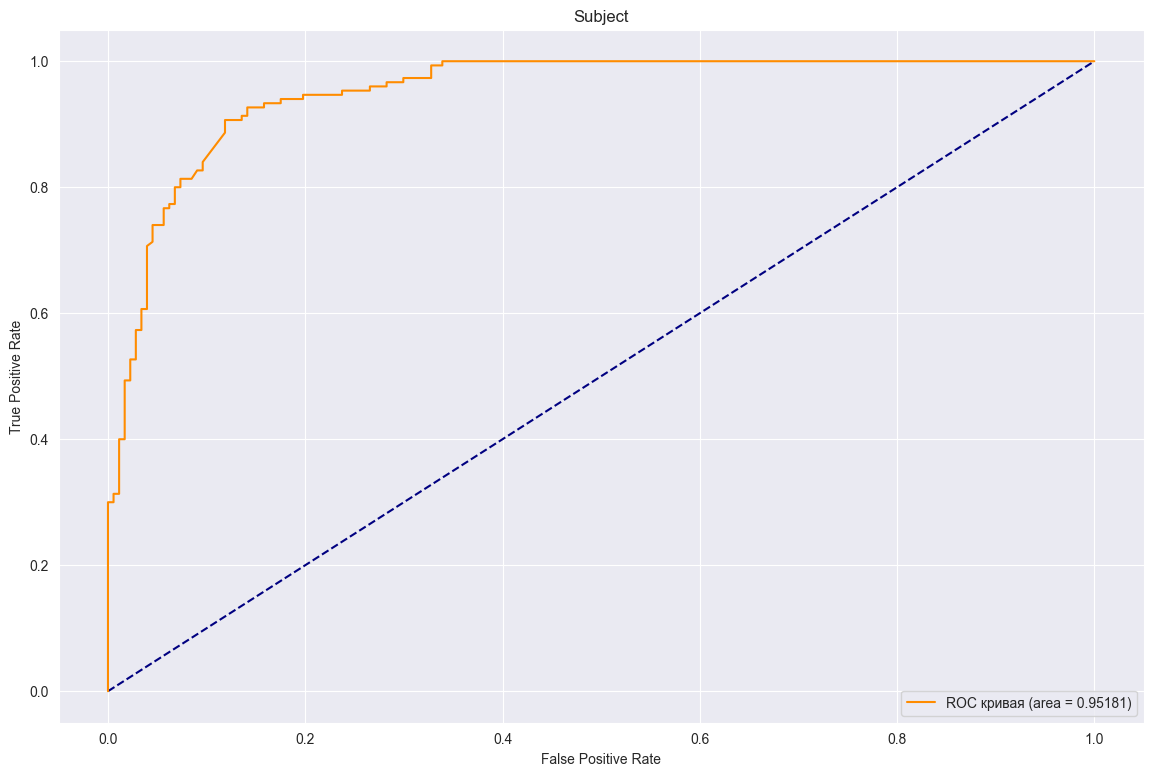

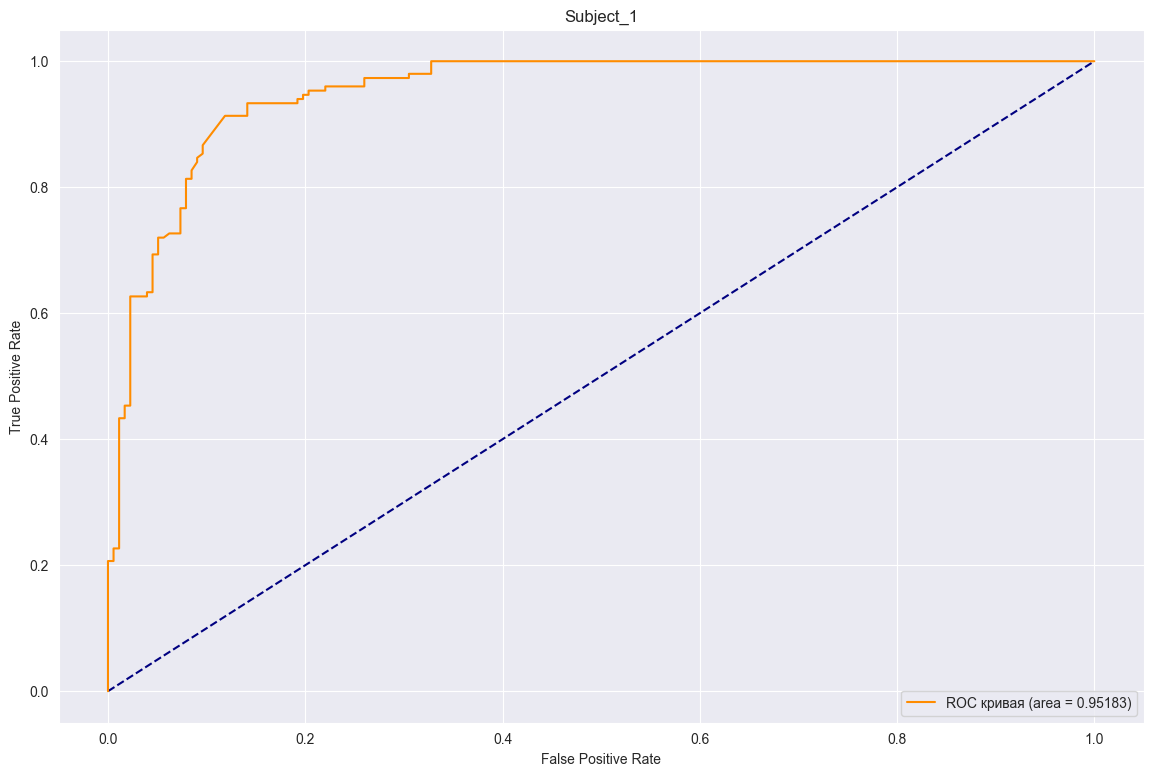

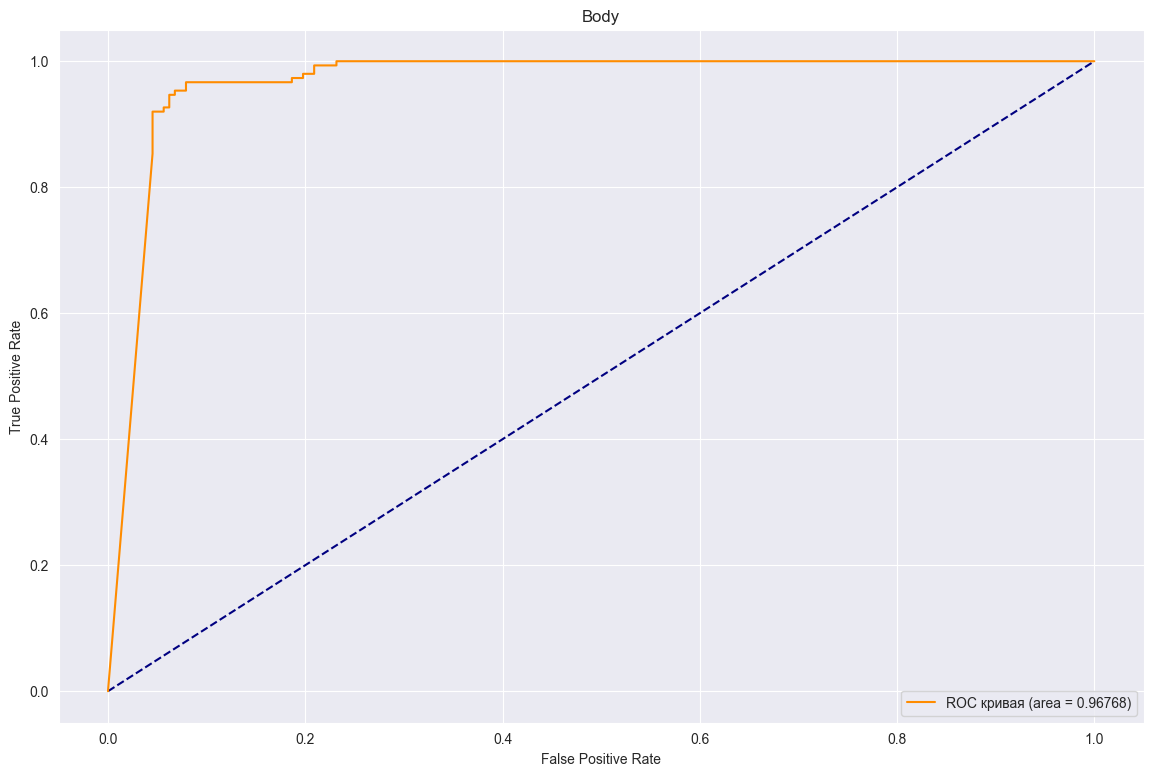

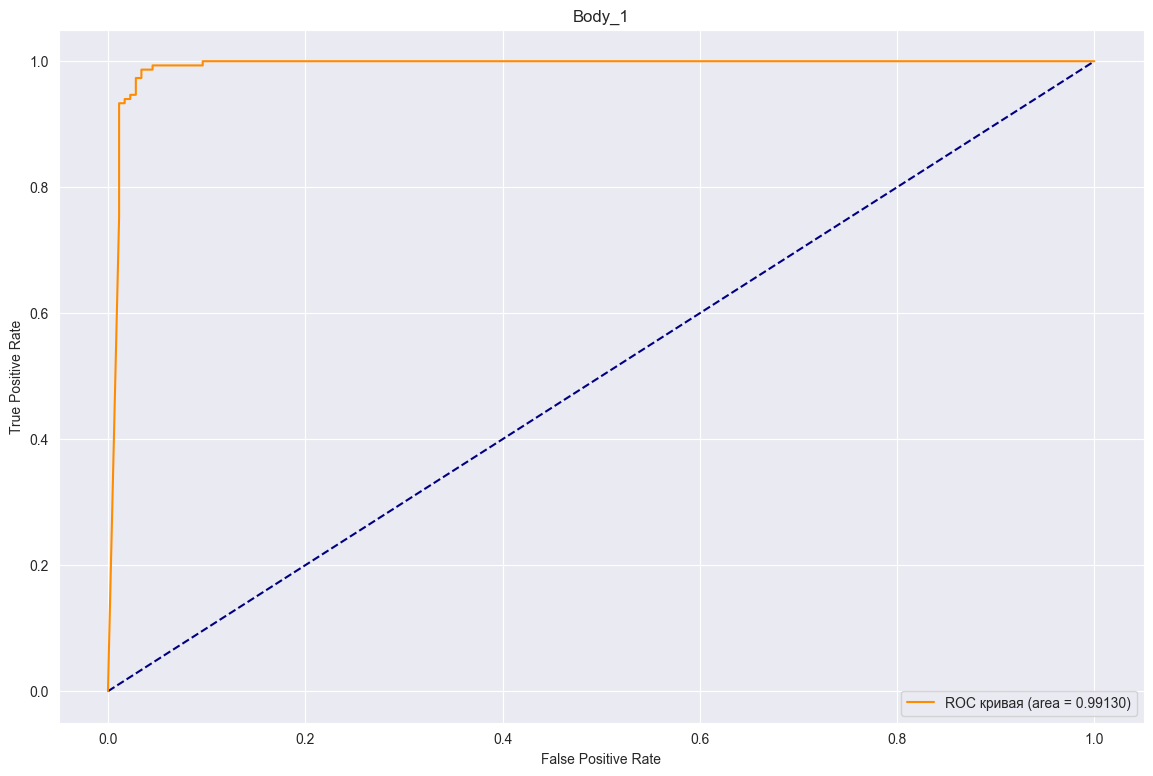

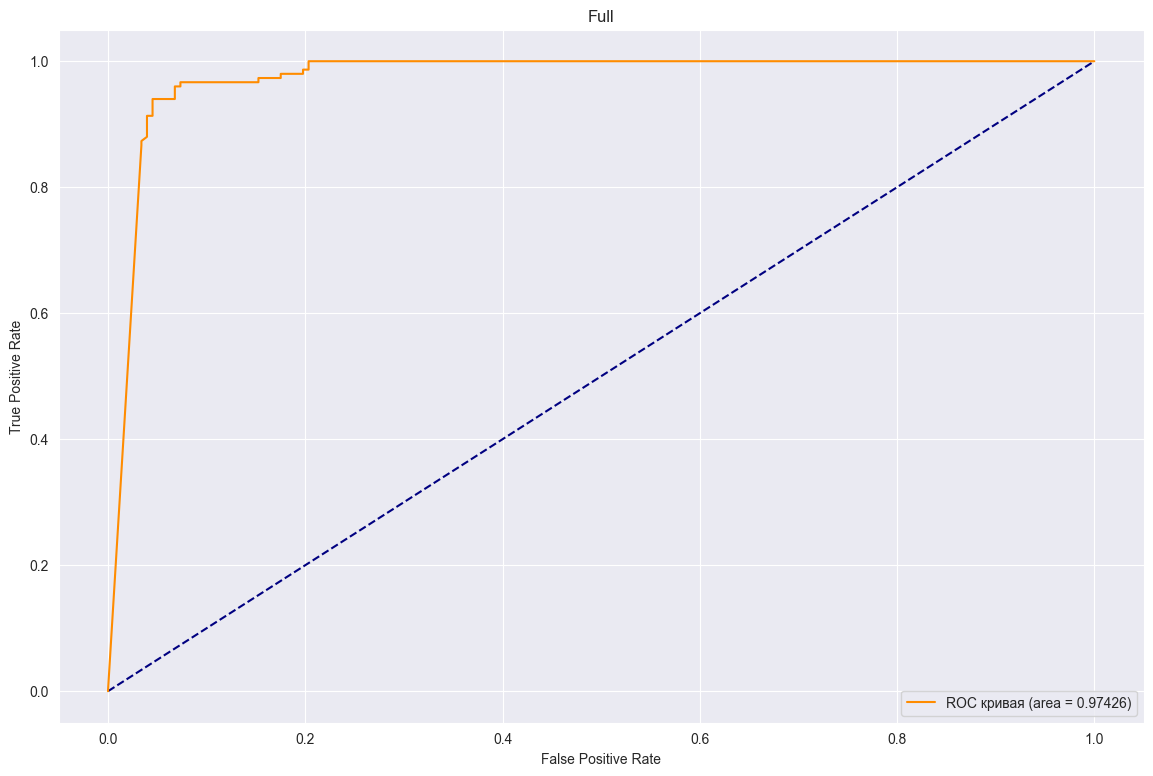

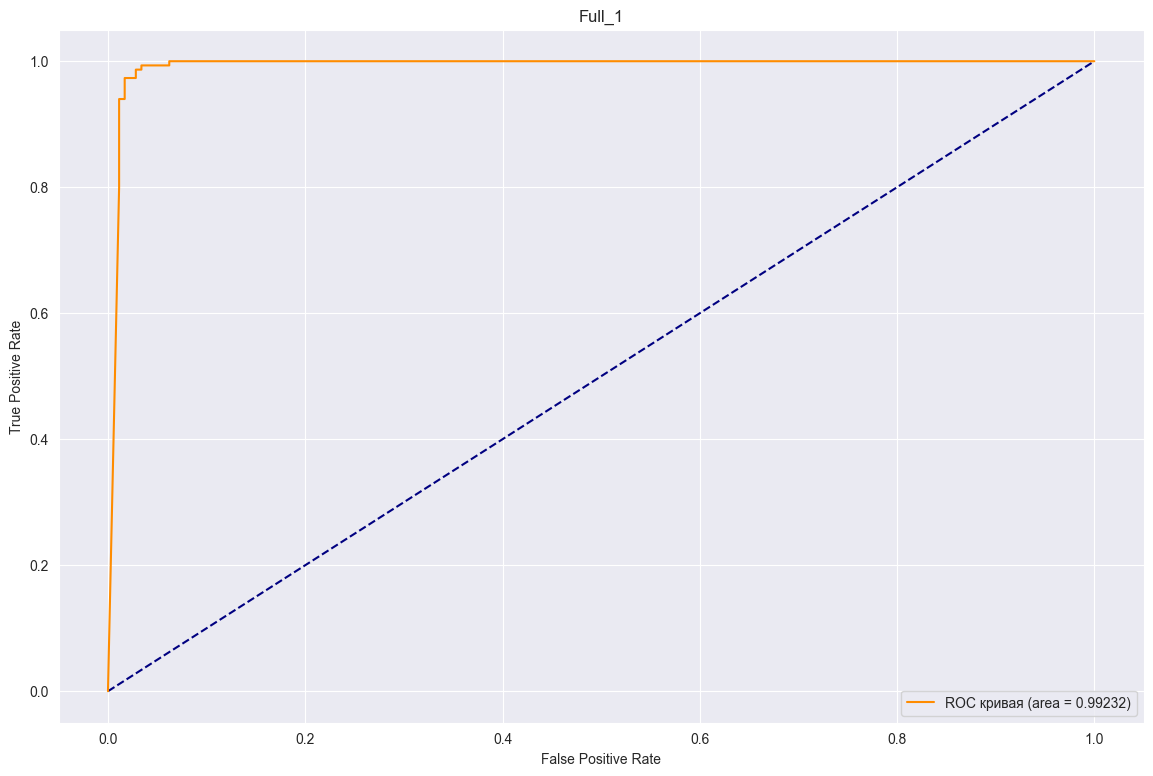

In [283]:
roc_auc(subject, "Subject")
roc_auc(subject_1, "Subject_1")
roc_auc(body, "Body")
roc_auc(body_1, "Body_1")
roc_auc(full, "Full")
roc_auc(full_1, "Full_1")

full_1 winner

In [284]:
def bayes_classifier_iterate(feature, weight, alpha = 1, print_confusion_matrix = False):
    X = feature
    y = df.spam
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
    # clf = MultinomialNB()
    clf = MultinomialNB(alpha=alpha, class_prior=[weight, 1 - weight])
    # clf = MultinomialNB(class_prior=[1 - weight, weight])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    if print_confusion_matrix:
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred), fp, weight)
    return (tn + tp) / len(y_test)

C:\Program Files\Python310\lib\site-packages\sklearn\naive_bayes.py:566: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)


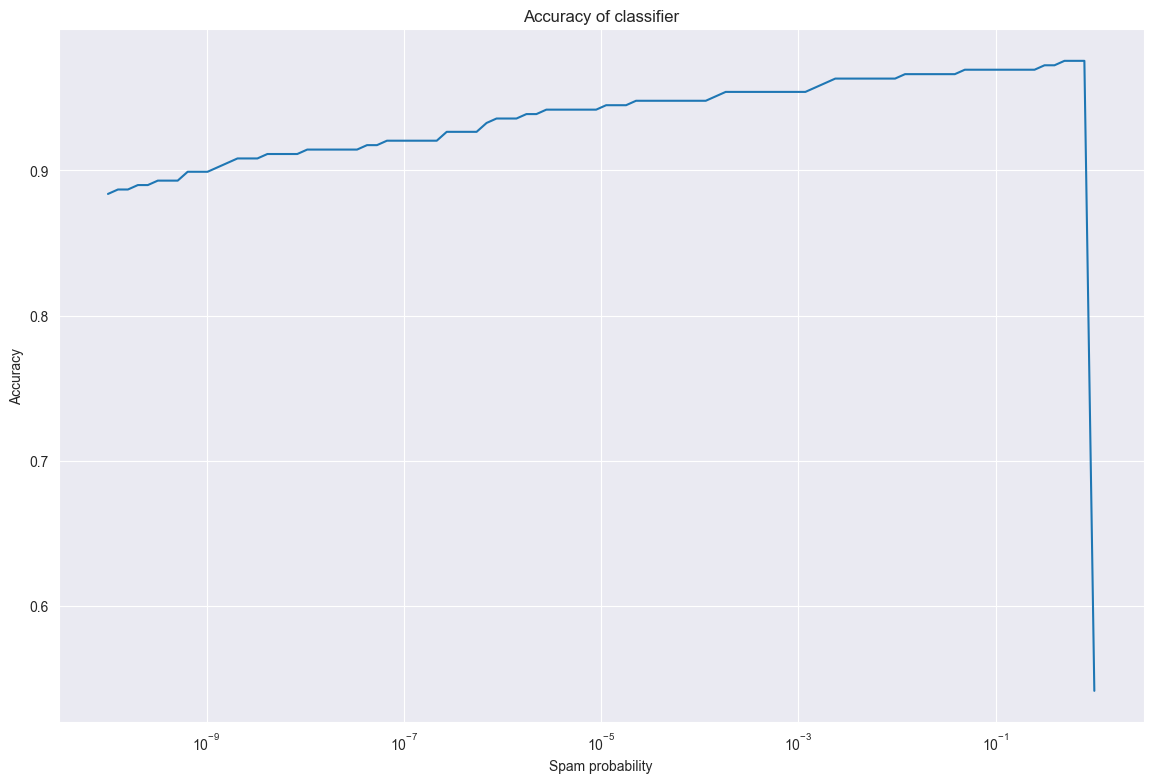

In [285]:
log = np.logspace(-10, 0, 100)
res = []
for i in log:
    # for a in np.linspace(0.1, 0.9, 10):
        # bayes_classifier_iterate(full_1, i, a, True)
    res += [bayes_classifier_iterate(full_1, i, print_confusion_matrix=False)]

_ = plt.subplots(figsize=(14, 9))
plt.plot(log, res)
plt.xscale('log')
plt.title("Accuracy of classifier")
plt.xlabel("Spam probability")
plt.ylabel("Accuracy")
plt.show()